### Practical examples with broadcasting

We'll start with a stock prices example, which shows how broadcasting and elementwise arithmetic
combine to make standard statistical scaling quite simple.

### Centering & scaling data: What stock ended up with the best value as compared with its mean value over the sample period?

To answer this question we essentially want to perform a **delta calculation**: subtract the mean value of the stock from the value on the last day.  The issue is what measure of value should we use when stock share prices differ significantly in scale  (compare IBM
and Microsoft in Feb 1990 in the output below).  We need some way of scaling the price differences so
as to make them comparable.

We will present one way of doing this without a great deal of discussion because this question is essentially a pretext for showing you how to **center** and **scale** data.

Strategy:  Center and scale each stock column to show stock price in standard deviation units.
(Plot the three resulting stock price lines, for fun).  **Delta calculation**:  For each stock, compute the difference between the mean value and the last day prices in the data in  standard deviation units.

What does matter is the choice of the units we use to represent stock values.  We choose
`standard deviation units` to scale because that is a reasonable way to standardize stockprices.
The combination of centering and scaling used here is called **z score** in statistics.

In [10]:
import pandas as pd
import os.path
import urllib.request 
import os.path
from matplotlib import pyplot as plt

# Load and preprocess the data

url_dir = 'https://gawron.sdsu.edu/python_for_ss/course_core/data'
time2 = pd.read_csv(os.path.join(url_dir,'stocks.csv'),index_col=0,converters={"date":pd.Timestamp})
time2 = time2.set_index('date')
month_groups=time2.resample('M')
mean_by_months = month_groups.mean()
df = mean_by_months[['AA','GE','IBM','MSFT']]

In [5]:
df[:5]

,AA,GE,IBM,MSFT
date,,,,
1990-02-28,5.043684,2.873158,17.781579,0.523158
1990-03-31,5.362273,2.963636,18.466818,0.595000
1990-04-30,5.141000,3.037500,18.767500,0.638500
1990-05-31,5.278182,3.160000,20.121818,0.731364
1990-06-30,5.399048,3.275714,20.933810,0.821429


The next cell actually centers and scales each column.  

In [4]:
(df - df.mean())/df.std()

,AA,GE,IBM,MSFT
date,,,,
1990-02-28,-1.288710,-1.418216,-1.172091,-1.508003
1990-03-31,-1.255604,-1.409703,-1.155745,-1.501460
1990-04-30,-1.278598,-1.402754,-1.148573,-1.497498
1990-05-31,-1.264343,-1.391229,-1.116268,-1.489040
1990-06-30,-1.251783,-1.380342,-1.096900,-1.480837
...,...,...,...,...
2011-06-30,-0.213580,0.032714,2.336573,0.657461
2011-07-31,-0.186770,0.052048,2.654514,0.885148
2011-08-31,-0.529118,-0.194660,2.439593,0.750245


In [7]:
mn,std = df.mean(),df.std()
# centering (the numerator)  & scaling (the denominator)
new_df=(df-mn)/std

How did **that** work?  Well, `pandas` sensibly decides
that in a normally structured DataFrame, it doesn't make sense to take
the mean or standard deviation of a row  (each column is potentially a different kind of thing),
so mean and standard deviation calculations are automatically applied to columns,
returning series instances indexed by column names.

In [363]:
std

AA       9.623
GE      10.629
IBM     41.923
MSFT    10.980
dtype: float64

In [364]:
mn

AA      17.445
GE      17.947
IBM     66.919
MSFT    17.080
dtype: float64

Since `mn` has the column handles of `df`, 
the means are broadcast columnwise when
they combine with `df`, so, for example, a value in 
the `AA` column of the DataFrame `(df - mn)`, say

```
(df - mn)["AA"]["1990-10-31"]
```

is the result of subtracting `mn['AA']` (the column mean) from 
`df["AA"]["1990-10-31"]`.

In [498]:
df["AA"]["1990-10-31"] - mn["AA"]

-12.761433276602373

In [497]:
(df - mn)["AA"]["1990-10-31"]

-12.761433276602373

In [367]:
(df-mn)[:5]

,AA,GE,IBM,MSFT
date,,,,
1990-02-28,-12.402,-15.074,-49.138,-16.557
1990-03-31,-12.083,-14.984,-48.452,-16.485
1990-04-30,-12.304,-14.910,-48.152,-16.442
1990-05-31,-12.167,-14.787,-46.797,-16.349
1990-06-30,-12.046,-14.672,-45.985,-16.259


The division by `std` (scaling to standard deviation units) works analogously; each value in `(df-mn)` is
divided by the standard deviation of its column.

Note: You can also use Scikit Learn's standard scaler for this task.  This produces a numpy array,
so you have to convert the output into a DataFrame.

In [499]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df),
                      index=df.index,
                      columns=df.columns)
scaled

,AA,GE,IBM,MSFT
date,,,,
1990-02-28,-1.291,-1.421,-1.174,-1.511
1990-03-31,-1.258,-1.412,-1.158,-1.504
1990-04-30,-1.281,-1.405,-1.151,-1.500
1990-05-31,-1.267,-1.394,-1.118,-1.492
1990-06-30,-1.254,-1.383,-1.099,-1.484
...,...,...,...,...
2011-06-30,-0.214,0.033,2.341,0.659
2011-07-31,-0.187,0.052,2.660,0.887
2011-08-31,-0.530,-0.195,2.444,0.752


Now for fun we can plot the value changes in the stocks across time with each line representing comparable
units.  The 0-line represents the mean value over the sample period for each stock.  

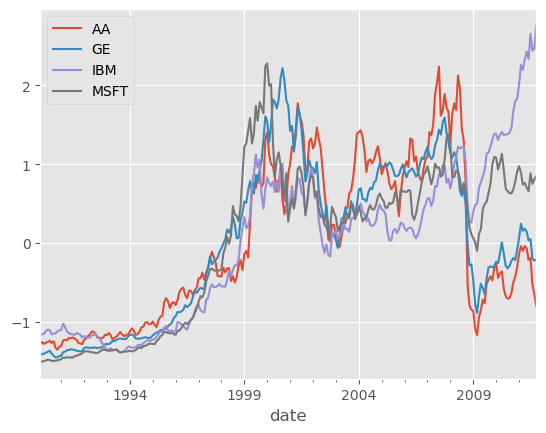

In [393]:
with mpl.style.context(['ggplot']):
    new_df.plot()
    plt.show()

**Delta calculation**: The winner, as the picture suggests, is IBM.

In [8]:
# (Values on last day) - (Mean value in std units)
stock_gains_over_mns = (new_df.iloc[-1] - (mn/std))
stock_gains_over_mns 

AA     -2.609568
GE     -1.896668
IBM     1.158471
MSFT   -0.709576
dtype: float64

Notice why this works.  `new_df.iloc[-1]`  is the last row, which has column handles, and
`mn` and `std` have column handles, which means `mn/std` has column handles,
which makes the subtraction above well-defined.  

In particular, the means for each column, expressed in std-units, are subtracted the last-day values for each column.

In [9]:
stock_gains_over_mns .sort_values(ascending=False).iloc[0:1]

IBM    1.158471
dtype: float64

#### Exercise

A much more standard way to evaluate a stcok's performance over a sample period is to compute the percentage gain between first day and
last day over the interval.  Using `pandas` elementwise operations, choose the
winner over the interval of the entire data set according to the  percentage gain in value:

```
(value on last day - value on first day)/value on first day
```

Start from `df`.  Don't do centering or scaling.

In [383]:
stock_increases = (df.iloc[-1] - df.iloc[0])/df.iloc[0]
stock_increases

AA       0.939
GE       4.477
IBM      9.258
MSFT    49.405
dtype: float64